In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf



In [2]:
# 1. Define Tickers and Time Range
tickers = ['EUNL.DE', 'PPFB.DE', 'IS3N.DE'] # World, Emerging, Gold
start_date = '2023-01-01'

#. downloading data
data = yf.download(tickers, start = start_date, auto_adjust= False)['Adj Close']
data


[*********************100%***********************]  3 of 3 completed


Ticker,EUNL.DE,IS3N.DE,PPFB.DE
Date,,,
2023-01-02,69.858002,26.871000,33.368000
2023-01-03,69.157997,27.240000,33.785999
2023-01-04,69.853996,27.655001,34.133999
2023-01-05,69.402000,27.837000,33.880001
2023-01-06,70.061996,28.089001,34.172001
...,...,...,...
2025-12-30,111.775002,38.348000,72.684998
2026-01-02,111.320000,39.139999,71.360001
2026-01-05,112.745003,39.763000,73.629997


In [3]:
# calculating log returns
log_returns = np.log(data / data.shift(1))
log_returns

Ticker,EUNL.DE,IS3N.DE,PPFB.DE
Date,,,
2023-01-02,NaN,NaN,NaN
2023-01-03,-0.010071,0.013639,0.012449
2023-01-04,0.010014,0.015120,0.010247
2023-01-05,-0.006492,0.006559,-0.007469
2023-01-06,0.009465,0.009012,0.008582
...,...,...,...
2025-12-30,0.001836,0.005386,0.014621
2026-01-02,-0.004079,0.020443,-0.018398
2026-01-05,0.012720,0.015792,0.031315


<Axes: xlabel='Date'>

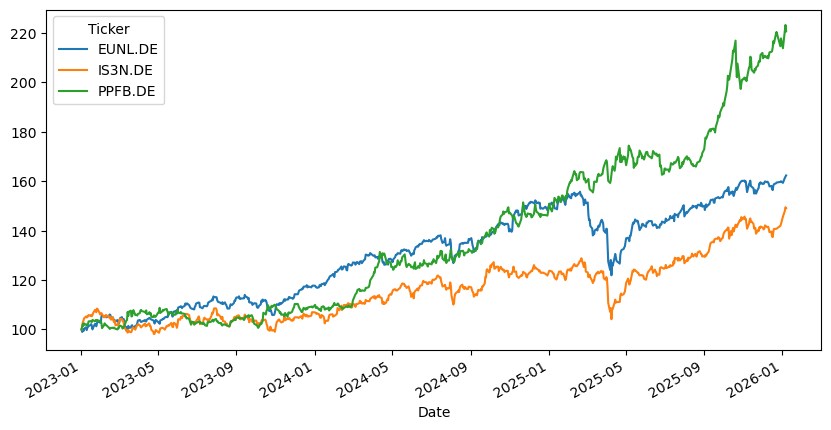

In [4]:
(data / data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
log_returns.mean()* 252

Ticker
EUNL.DE    0.159853
IS3N.DE    0.131700
PPFB.DE    0.261123
dtype: float64

In [6]:
log_returns.cov() *252

Ticker,EUNL.DE,IS3N.DE,PPFB.DE
Ticker,,,
EUNL.DE,0.017587,0.013379,0.000534
IS3N.DE,0.013379,0.020290,0.002257
PPFB.DE,0.000534,0.002257,0.021180


In [7]:
log_returns.corr()

Ticker,EUNL.DE,IS3N.DE,PPFB.DE
Ticker,,,
EUNL.DE,1.000000,0.708238,0.027674
IS3N.DE,0.708238,1.000000,0.108885
PPFB.DE,0.027674,0.108885,1.000000


In [8]:
number_of_assets = len(tickers)
weights = np.random.random(number_of_assets)
weights /= np.sum(weights)
weights

array([0.69741331, 0.23635156, 0.06623513])

In [9]:
# expected return
np.sum(weights * log_returns.mean()) * 252

np.float64(0.15990647341942107)

In [10]:
# expected variance
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))

np.float64(0.014310900330478086)

In [11]:
# expected volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))

np.float64(0.11962817532035706)

In [12]:
risk_free_rate = 0.025

pfolio_returns = []
pfolio_volatilities = []
sharpe_ratio = []
pfolio_weights = []

for x in range(100000):
    weights = np.random.random(number_of_assets)
    weights /= np.sum(weights)
    
    pfolio_weights.append(weights)   
    
    # Portfolio return
    portfolio_return = np.sum(weights * log_returns.mean()) * 252
    pfolio_returns.append(portfolio_return)
    
    # Portfolio volatility
    portfolio_volatility = np.sqrt(
        np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
    )
    pfolio_volatilities.append(portfolio_volatility)
    
    # Sharpe ratio
    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility
    sharpe_ratio.append(sharpe)

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_ratio = np.array(sharpe_ratio)
pfolio_weights = np.array(pfolio_weights)


In [13]:
portfolio = pd.DataFrame({
    'Return': pfolio_returns,
    'Volatility': pfolio_volatilities,
    'Sharpe_Ratio': sharpe_ratio
})

# Add weights as separate columns
for i, ticker in enumerate(tickers):
    portfolio[f'Weight_{ticker}'] = pfolio_weights[:, i]


In [14]:
portfolio

,Return,Volatility,Sharpe_Ratio,Weight_EUNL.DE,Weight_PPFB.DE,Weight_IS3N.DE
0,0.177909,0.103530,1.476951,0.478029,0.268916,0.253055
1,0.151335,0.121811,1.037138,0.482497,0.470747,0.046755
2,0.175833,0.104203,1.447492,0.440460,0.314349,0.245191
3,0.168809,0.109280,1.315963,0.532388,0.296694,0.170918
4,0.195373,0.106661,1.597337,0.013302,0.497617,0.489081
...,...,...,...,...,...,...
99995,0.151265,0.121443,1.039704,0.196490,0.695082,0.108428
99996,0.228140,0.108766,1.867684,0.298112,0.021581,0.680307
99997,0.192587,0.100762,1.663189,0.209643,0.365510,0.424847
99998,0.145044,0.126497,0.948986,0.239089,0.709818,0.051093


In [15]:
# max sharpe ratio (tangent)
max_sharpe = sharpe_ratio.argmax()
max_sharpe_return = pfolio_returns[max_sharpe]
max_sharpe_volatility = pfolio_volatilities[max_sharpe]
max_sharpe_weights = pfolio_weights[max_sharpe]

# Min volatility
min_volatility = pfolio_volatilities.argmin()
min_volatility_return = pfolio_returns[min_volatility]
min_volatility_volatility = pfolio_volatilities[min_volatility]
min_volatility_weights = pfolio_weights[min_volatility]



In [16]:
# Create volatility bins
portfolio['Vol_bin'] = pd.cut(portfolio['Volatility'], bins=100)

# For each bin, take the max return
efficient_frontier = portfolio.groupby('Vol_bin').max()

# Drop NaNs
efficient_frontier = efficient_frontier.dropna()


/var/folders/y3/9gvskmz92w9497s4v4tvb1k80000gn/T/ipykernel_25303/2968115405.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  efficient_frontier = portfolio.groupby('Vol_bin').max()


In [17]:
def print_stats(name, returns , volatility , weight):
    print(f"\n--- {name} ---")
    print(f"Return: {returns:.2%}")
    print(f"Volatility: {volatility:.2%}")
    print(f"Sharpe Ratio: {(returns - risk_free_rate)/volatility:.2f}")
    print("Allocation:")
    for t, val in zip(tickers, weight):
        print(f"  {t}: {val:.1%}")

print("Results")
print_stats("MAX SHARPE (Aggressive)", max_sharpe_return, max_sharpe_volatility, max_sharpe_weights)
print_stats("MIN VOLATILITY (Conservative)", min_volatility_return, min_volatility_volatility, min_volatility_weights)


Results

--- MAX SHARPE (Aggressive) ---
Return: 22.03%
Volatility: 10.33%
Sharpe Ratio: 1.89
Allocation:
  EUNL.DE: 40.2%
  PPFB.DE: 0.0%
  IS3N.DE: 59.7%

--- MIN VOLATILITY (Conservative) ---
Return: 19.91%
Volatility: 9.82%
Sharpe Ratio: 1.77
Allocation:
  EUNL.DE: 42.3%
  PPFB.DE: 14.8%
  IS3N.DE: 42.9%


Text(0.5, 1.0, 'Efficient Frontier')

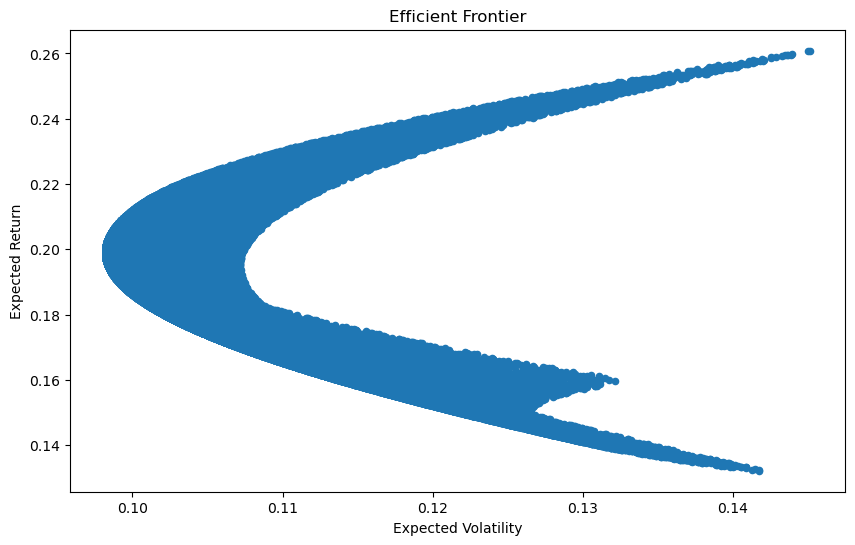

In [18]:
# plot 1- efficient frontier- each combination of portfolio for risk and return 
portfolio.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')


Text(0.5, 1.0, 'Efficient Frontier with Respective Sharpe Ratio')

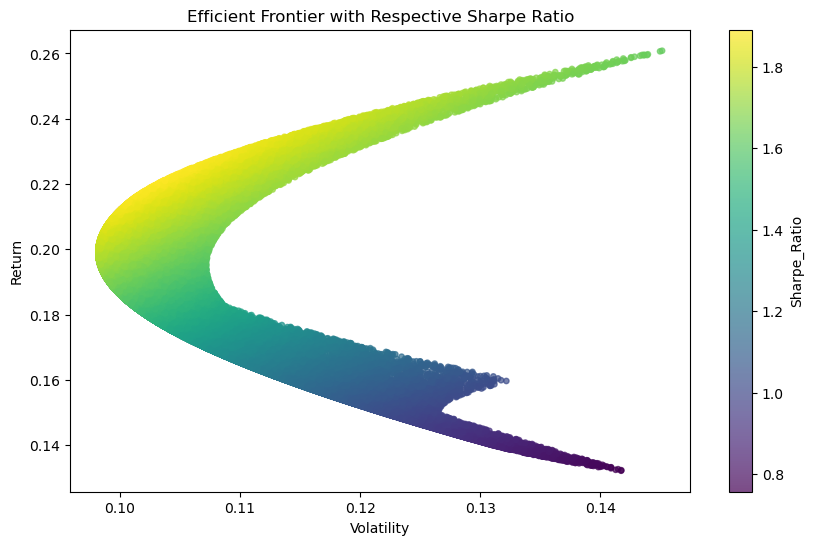

In [19]:
# plot 2- with defined sharpe ratio colours 
portfolio.plot.scatter(x='Volatility', y='Return', c='Sharpe_Ratio', cmap='viridis', figsize=(10, 6), s=15, alpha=0.7)
plt.title('Efficient Frontier with Respective Sharpe Ratio')



In [20]:
# Slope of Capital Allocation Line
cal_slope = (max_sharpe_return - risk_free_rate) / max_sharpe_volatility
# xaxis: volatility range
cal_x = np.linspace(0, portfolio['Volatility'].max(), 100)
# CAL equation
cal_y = risk_free_rate + cal_slope * cal_x


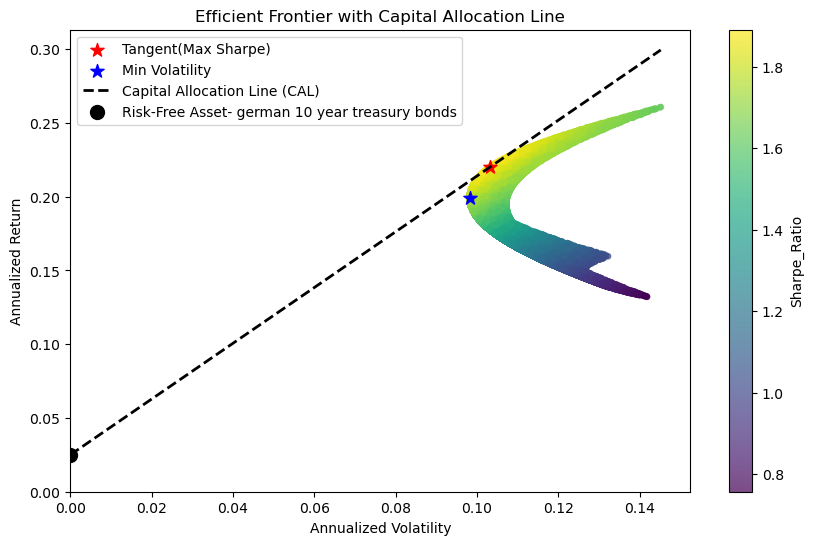

In [21]:
# plot 3 efficient frontier with cal 
portfolio.plot.scatter(x='Volatility', y='Return', c='Sharpe_Ratio', cmap='viridis', figsize=(10, 6), s=15, alpha=0.7)

# Max Sharpe (Tangent)
plt.scatter( max_sharpe_volatility, max_sharpe_return, color='red', marker='*', s=100, label='Tangent(Max Sharpe)')

# Min Volatility
plt.scatter( min_volatility_volatility, min_volatility_return, color='blue', marker='*', s=100, label='Min Volatility')

# Capital Allocation Line
plt.plot(cal_x, cal_y, linestyle='--', color='black', linewidth=2, label='Capital Allocation Line (CAL)')

# Risk-free asset (intercept)
plt.scatter(0, risk_free_rate, color='black', s=100, label='Risk-Free Asset- german 10 year treasury bonds')

# axes to show the intercept
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.title('Efficient Frontier with Capital Allocation Line')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.show()





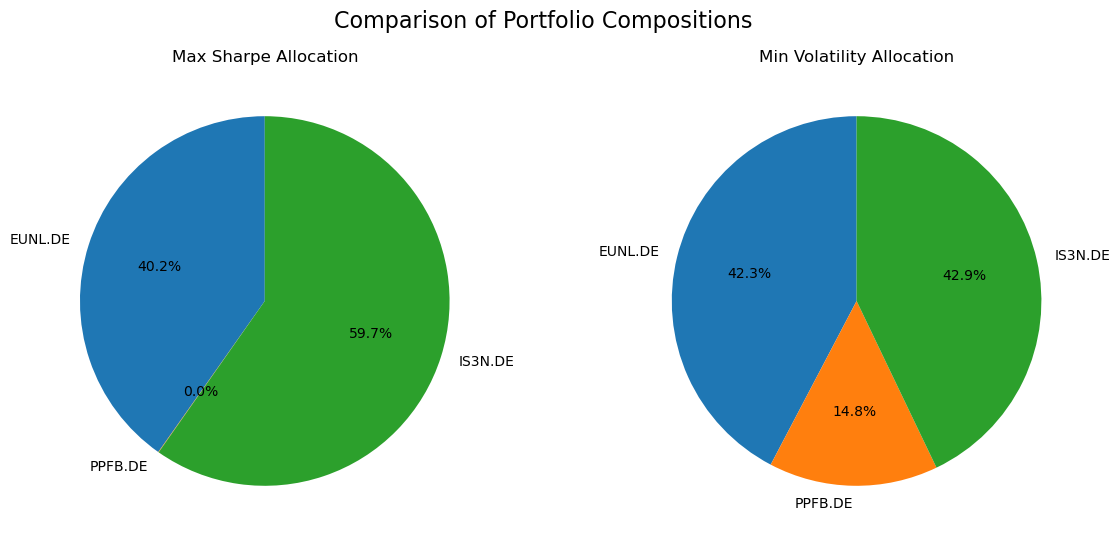


--- MAX SHARPE (Aggressive) ---
Return: 22.03%
Volatility: 10.33%
Sharpe Ratio: 1.89
Allocation:
  EUNL.DE: 40.2%
  PPFB.DE: 0.0%
  IS3N.DE: 59.7%

--- MIN VOLATILITY (Conservative) ---
Return: 19.91%
Volatility: 9.82%
Sharpe Ratio: 1.77
Allocation:
  EUNL.DE: 42.3%
  PPFB.DE: 14.8%
  IS3N.DE: 42.9%


In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Max Sharpe Allocation
ax1.pie(
    max_sharpe_weights,
    labels=tickers,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
ax1.set_title('Max Sharpe Allocation')

# Min Volatility Allocation
ax2.pie(
    min_volatility_weights,
    labels=tickers,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
ax2.set_title('Min Volatility Allocation')

plt.suptitle('Comparison of Portfolio Compositions', fontsize=16)
plt.show()

print_stats("MAX SHARPE (Aggressive)", max_sharpe_return, max_sharpe_volatility, max_sharpe_weights)
print_stats("MIN VOLATILITY (Conservative)", min_volatility_return, min_volatility_volatility, min_volatility_weights)